## Importing Libraries 

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading Data Set 

In [57]:
data = pd.read_csv("drug200.csv")

In [58]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [60]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [61]:
data.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [62]:
data.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [63]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [64]:
skewAge = data.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [65]:
skewNatoK = data.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


C:\Users\hp\AppData\Local\Temp\ipykernel_15960\3367592513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age']);


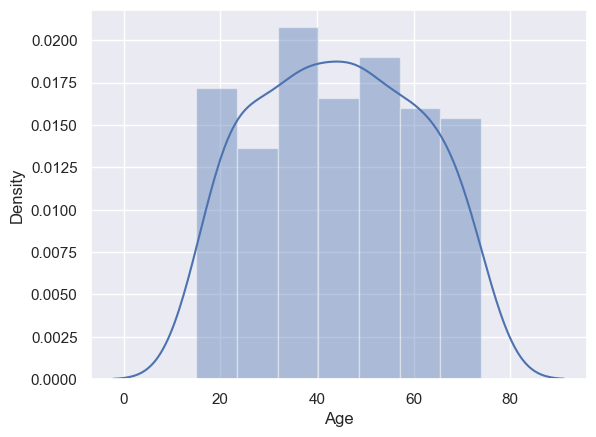

In [66]:
sns.distplot(data['Age']);

C:\Users\hp\AppData\Local\Temp\ipykernel_15960\2560560465.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Na_to_K']);


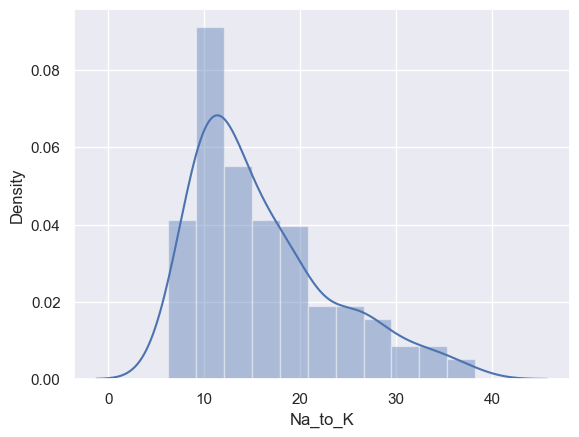

In [67]:
sns.distplot(data['Na_to_K']);

##  Distribution 

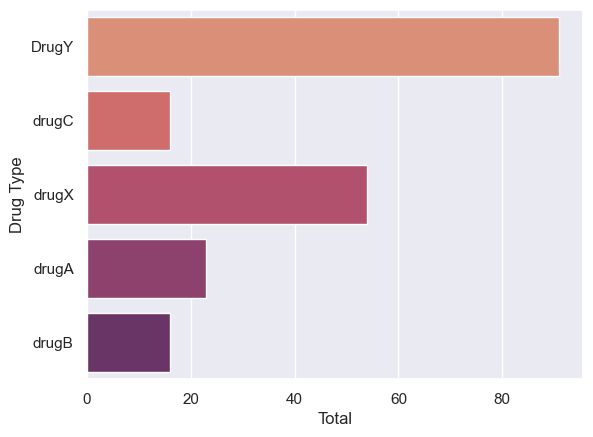

In [68]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=data, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

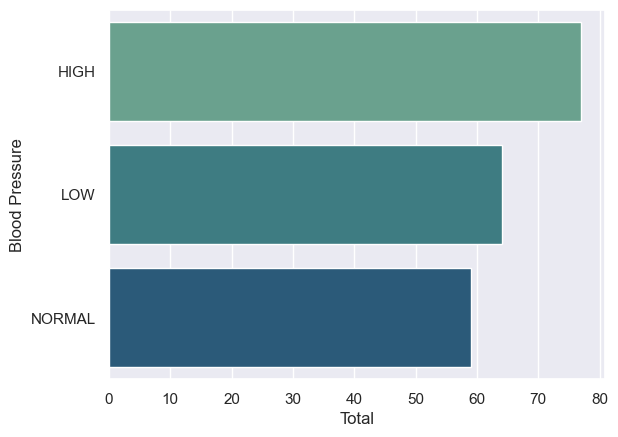

In [69]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=data, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

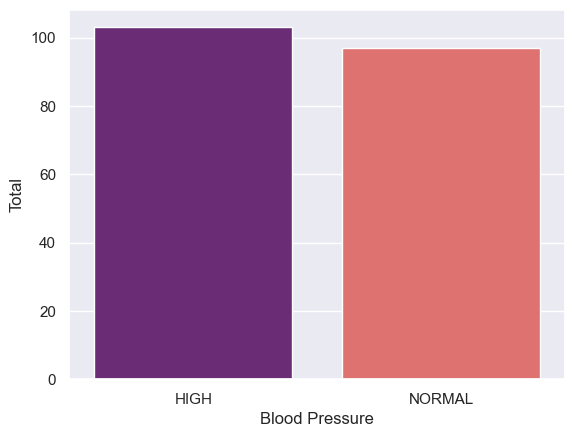

In [70]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=data, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

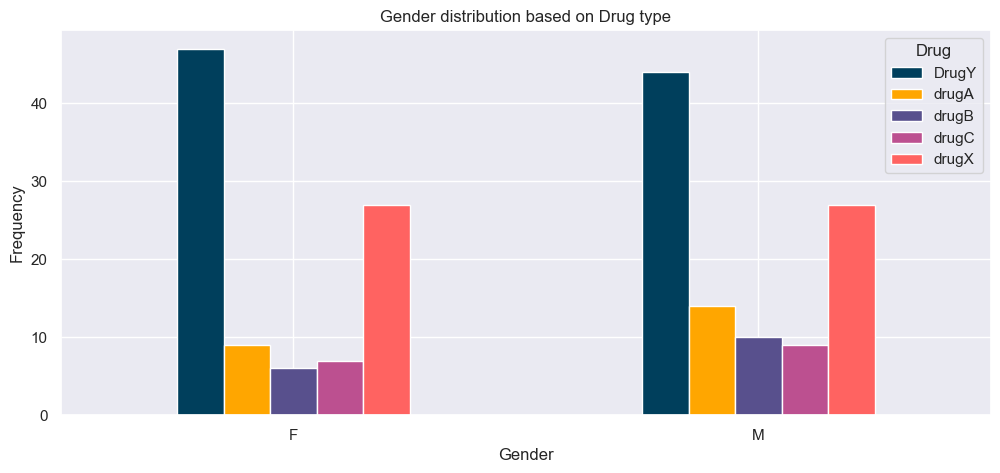

In [71]:
pd.crosstab(data.Sex,data.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Dataset Preparation 

In [72]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
data['Age_binned'] = pd.cut(data['Age'], bins=bin_age, labels=category_age)
data = data.drop(['Age'], axis = 1)

In [73]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
data['Na_to_K_binned'] = pd.cut(data['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
data = data.drop(['Na_to_K'], axis = 1)

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [75]:
X = data.drop(["Drug"], axis=1)
y = data["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Engineering

In [76]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [77]:

X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True
96,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
181,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False
19,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
153,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False


In [78]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
170,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False
107,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
98,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
177,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False


## SVC

In [82]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 85.00%


In [83]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 85.00%


## Naive bayes

In [84]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       0.95      0.67      0.78        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.81      0.94      0.87        18

    accuracy                           0.82        60
   macro avg       0.76      0.92      0.82        60
weighted avg       0.85      0.82      0.81        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Naive Bayes accuracy is: 81.67%


In [85]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Gaussian Naive Bayes accuracy is: 85.00%


In [86]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       0.83      0.67      0.74        30
       drugA       0.43      0.60      0.50         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.77        60
   macro avg       0.70      0.83      0.75        60
weighted avg       0.79      0.77      0.77        60

[[20  4  1  2  3]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Decision Tree accuracy is: 76.67%


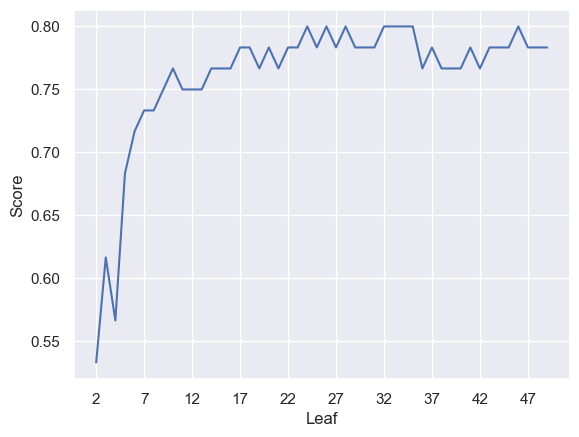

DT Acc Max 80.00%


In [87]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [88]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       0.88      0.70      0.78        30
       drugA       0.67      0.80      0.73         5
       drugB       0.67      0.67      0.67         3
       drugC       0.67      1.00      0.80         4
       drugX       0.81      0.94      0.87        18

    accuracy                           0.80        60
   macro avg       0.74      0.82      0.77        60
weighted avg       0.81      0.80      0.80        60

[[21  2  1  2  4]
 [ 1  4  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Random Forest accuracy is: 80.00%


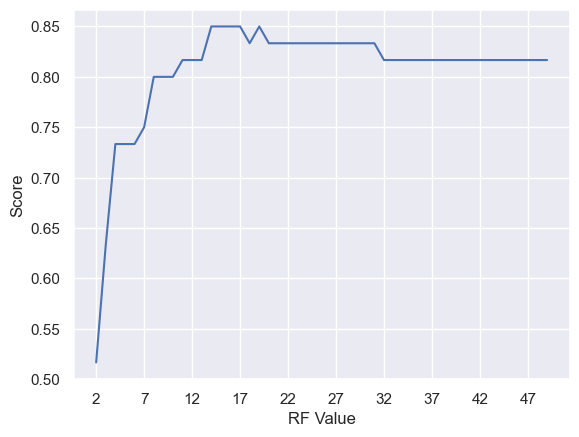

RF Acc Max 85.00%


In [89]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [91]:
compare = pd.DataFrame({'Model': [ 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,SVM,85.000000
2,Gaussian NB,85.000000
6,Random Forest Max,85.000000
1,Categorical NB,81.666667
4,Decision Tree Max,80.000000
5,Random Forest,80.000000
3,Decision Tree,76.666667
